In [30]:
import warnings

warnings.filterwarnings("ignore")

In [31]:
import cv2 
import tensorflow as tf 
import os
from matplotlib import pyplot as plt 
import numpy as np 

In [47]:
mainDirectory = "C:/Users/laksh/Downloads/Alzhimers/AugmentedAlzheimerDataset/"

In [48]:
imageHeight = 512
imageWidth = 512

# Types of the alzhimers and its directory name
tumourCategories = ["VeryMildDemented", "NonDemented", "ModerateDemented", "MildDemented"] 

VeryMildDemented = []
NonDemented = []
ModerateDemented = []
MildDemented = []
for classess in tumourCategories:
    pathDirectory = os.path.join(mainDirectory, classess)
    for image in os.listdir(path=pathDirectory):
       # Taking images of all image directories
       image_array = cv2.imread(os.path.join(pathDirectory, image))
       image_array = cv2.resize(image_array, (imageHeight, imageWidth))
       if classess == "VeryMildDemented":
         VeryMildDemented.append(image_array)
       elif classess == "NonDemented":
         NonDemented.append(image_array)
       elif classess == "ModerateDemented":
         ModerateDemented.append(image_array)
       else:
        MildDemented.append(image_array)

# Converting the lists into numpy arrays for tumour types
VeryMildDemented = np.array(VeryMildDemented)
NonDemented = np.array(NonDemented)
ModerateDemented = np.array(ModerateDemented)
MildDemented = np.array(MildDemented)

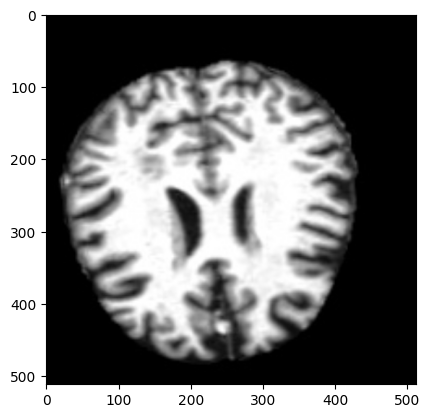

In [49]:
plt.imshow(VeryMildDemented[0])

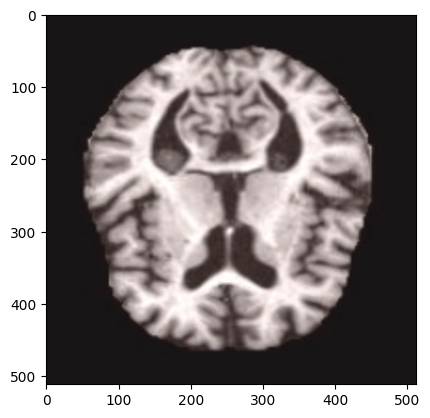

In [50]:
plt.imshow(NonDemented[1])

In [51]:
import os
import cv2
import numpy as np
from skimage import img_as_ubyte
from scipy.ndimage import gaussian_filter
from sklearn.utils import resample

# Function to apply Random Up Sampler and Gaussian Filter
def apply_filters(image_array, output_folder):
    # Creating the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    for i, img in enumerate(image_array):
        # Random Up Sampler
        upsampled_img = resample([img], n_samples=2)[0]
        
        # Gaussian Filter
        filtered_img = gaussian_filter(upsampled_img, sigma=1)
        
        # Writing filtered image to the output folder
        filename = f"{output_folder}/filtered_{i}.png"
        cv2.imwrite(filename, img_as_ubyte(filtered_img))

# Applying filters to each tumour type
apply_filters(VeryMildDemented, "VeryMildDemented_filtered")
apply_filters(NonDemented, "NonDemented_filtered")
apply_filters(ModerateDemented, "ModerateDemented_filtered")
apply_filters(MildDemented, "MildDemented_filtered")

In [52]:
import os
import cv2
import numpy as np
from skimage import img_as_ubyte
from scipy.ndimage import gaussian_filter
from sklearn.utils import resample

# Function to apply Random Up Sampler, Gaussian Filter, and Resampling
def apply_filters(image_array, output_folder, target_count):
    # Creating the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Convert the list of images to a 2D array
    image_array = np.array(image_array)
    
    # Calculate the number of samples needed to reach the target count
    current_count = len(image_array)
    num_samples = max(0, target_count - current_count)

    # Resample to balance the class distribution
    if num_samples > 0:
        resampled_images = resample(image_array, n_samples=num_samples, random_state=42)
        image_array = np.concatenate([image_array, resampled_images])

    # Apply filters to each image
    for i, img in enumerate(image_array):
        # Random Up Sampler
        upsampled_img = resample([img], n_samples=2)[0]
        
        # Gaussian Filter
        filtered_img = gaussian_filter(upsampled_img, sigma=1)
        
        # Writing filtered image to the output folder
        filename = f"{output_folder}/filtered_{i}.png"
        cv2.imwrite(filename, img_as_ubyte(filtered_img))

# Define the target counts for each class after resampling
target_counts = {
    "VeryMildDemented_filtered": 10000,
    "NonDemented_filtered": 10000,
    "ModerateDemented_filtered": 10000,
    "MildDemented_filtered": 10000
}

# Assuming VeryMildDemented, NonDemented, ModerateDemented, and MildDemented are lists of image arrays
# Applying filters to each class
apply_filters(VeryMildDemented, "VeryMildDemented_filtered", target_counts["VeryMildDemented_filtered"])
apply_filters(NonDemented, "NonDemented_filtered", target_counts["NonDemented_filtered"])
apply_filters(ModerateDemented, "ModerateDemented_filtered", target_counts["ModerateDemented_filtered"])
apply_filters(MildDemented, "MildDemented_filtered", target_counts["MildDemented_filtered"])

In [58]:
imageHeight = 256
imageWidth = 256

mainDirectory = "C:/Users/laksh/Downloads/Alzhimers/"
# Types of the alzhimers and its directory name
tumourCategories = ["VeryMildDemented_filtered", "NonDemented_filtered", "ModerateDemented_filtered", "MildDemented_filtered"] 

VeryMildDemented = []
NonDemented = []
ModerateDemented = []
MildDemented = []
for classess in tumourCategories:
    pathDirectory = os.path.join(mainDirectory, classess)
    for image in os.listdir(path=pathDirectory):
       # Taking images of all image directories
       image_array = cv2.imread(os.path.join(pathDirectory, image))
       image_array = cv2.resize(image_array, (imageHeight, imageWidth))
       if classess == "VeryMildDemented_filtered":
         VeryMildDemented.append(image_array)
       elif classess == "NonDemented_filtered":
         NonDemented.append(image_array)
       elif classess == "ModerateDemented_filtered":
         ModerateDemented.append(image_array)
       else:
        MildDemented.append(image_array)

# Converting the lists into numpy arrays for tumour types
VeryMildDemented = np.array(VeryMildDemented)
NonDemented = np.array(NonDemented)
ModerateDemented = np.array(ModerateDemented)
MildDemented = np.array(MildDemented)

In [59]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np

# Concatenate the arrays and create labels for each class
X = np.concatenate((VeryMildDemented, NonDemented, ModerateDemented, MildDemented))
y = np.concatenate((['VeryMildDemented'] * len(VeryMildDemented),
                    ['NonDemented'] * len(NonDemented),
                    ['ModerateDemented'] * len(ModerateDemented),
                    ['MildDemented'] * len(MildDemented)))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
import pandas as pd  # To check data is balanced

data = pd.DataFrame(y_train)
data[0].value_counts()  

0
NonDemented         8033
ModerateDemented    8014
MildDemented        8000
VeryMildDemented    7953
Name: count, dtype: int64

In [66]:
data = pd.DataFrame(y_test)
data[0].value_counts() 

0
VeryMildDemented    2047
MildDemented        2000
ModerateDemented    1986
NonDemented         1967
Name: count, dtype: int64

In [63]:
from sklearn.preprocessing import LabelEncoder
# Use fit_transform on the training set
labelEncoder = LabelEncoder()
train_y_encoded = labelEncoder.fit_transform(y_train)

# Use transform on the test set
test_y_encoded = labelEncoder.transform(y_test)

# Main directory to store training and testing data
mainDataDirectory = "C:/Users/laksh/Downloads/Alzhimers/AlzhimerFinalData/"

# Making two directories for both training and testing data sets
trainDirectory = os.path.join(mainDataDirectory, 'Train')
testDirectory = os.path.join(mainDataDirectory, 'Test')

# Categories of tumour classification
tumourCategories = ["VeryMildDemented", "NonDemented", "ModerateDemented", "MildDemented"]

# Creating the subdirectories by checking whether they already exist
for category in tumourCategories:
    os.makedirs(os.path.join(trainDirectory, category), exist_ok=True)
    os.makedirs(os.path.join(testDirectory, category), exist_ok=True)

# Save training images
for i in range(len(X_train)):
    category = tumourCategories[int(train_y_encoded[i])]
    filename = f"{category}_train_{i}.jpg"
    filepath = os.path.join(trainDirectory, category, filename)
    cv2.imwrite(filepath, X_train[i])

# Save testing images
for i in range(len(X_test)):
    category = tumourCategories[int(test_y_encoded[i])]
    filename = f"{category}_test_{i}.jpg"
    filepath = os.path.join(testDirectory, category, filename)
    cv2.imwrite(filepath, X_test[i]) 

In [3]:
import gc
# Categories of tumour classification
alzhimerCategories = ["VeryMildDemented", "NonDemented", "ModerateDemented", "MildDemented"]
# Main directory where data is saved
mainDataDirectory = "C:/Users/laksh/Downloads/Alzhimers/AlzhimerFinalData/"

# Directories for training and testing data
trainDirectory = os.path.join(mainDataDirectory, 'Train')
testDirectory = os.path.join(mainDataDirectory, 'Test')

# Function to read images from a directory
def read_images_from_directory(directory):
    images = []
    labels = []
    for category in alzhimerCategories:
        category_path = os.path.join(directory, category)
        label = alzhimerCategories.index(category)
        for filename in os.listdir(category_path):
            image_path = os.path.join(category_path, filename)
            image = cv2.imread(image_path)
            # You may need to resize or preprocess the images here if necessary
            images.append(image)
            if label == 0:
                labels.append("VeryMildDemented")
            elif label == 1:
                labels.append("NonDemented")
            elif label == 2:
                labels.append("ModerateDemented")
            elif label == 3:
                labels.append("MildDemented")
    return images, labels

# Read training images
train_x, train_y = read_images_from_directory(trainDirectory)

# Read testing images
test_x, test_y = read_images_from_directory(testDirectory)

# Convert the lists to numpy arrays
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

# Perform garbage collection to free up memory
gc.collect()

620

In [4]:
import pandas as pd  # To check data is balanced

data = pd.DataFrame(train_y)
data[0].value_counts()  

0
ModerateDemented    8033
NonDemented         8014
VeryMildDemented    8000
MildDemented        7953
Name: count, dtype: int64

In [5]:
data = pd.DataFrame(test_y)
data[0].value_counts() 

0
MildDemented        2047
VeryMildDemented    2000
NonDemented         1986
ModerateDemented    1967
Name: count, dtype: int64

In [6]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((32000, 256, 256, 3), (32000,), (8000, 256, 256, 3), (8000,))

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

disease = {'VeryMildDemented': 0, 'NonDemented': 1, 'ModerateDemented': 2, 'MildDemented': 3}

train_y = [disease[x] for x in train_y]
test_y = [disease[x] for x in test_y]
# Assuming you have the following variables defined: train_x, test_x, train_y, test_y

# Convert labels to one-hot encoded format
train_y_one_hot = to_categorical(train_y, num_classes=4)  
test_y_one_hot = to_categorical(test_y, num_classes=4)

In [32]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import models, layers

# Load pre-trained EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))  # Assuming 4 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y_one_hot, epochs=40, batch_size=32, validation_data=(test_x, test_y_one_hot))

Epoch 1/40
1000/1000 [==============================] - 1566s 2s/step - loss: 0.9321 - accuracy: 0.5806 - val_loss: 0.7202 - val_accuracy: 0.6684
Epoch 2/40
1000/1000 [==============================] - 1506s 2s/step - loss: 0.7613 - accuracy: 0.6491 - val_loss: 0.6418 - val_accuracy: 0.7057
Epoch 3/40
1000/1000 [==============================] - 1514s 2s/step - loss: 0.7216 - accuracy: 0.6694 - val_loss: 0.6144 - val_accuracy: 0.7194
Epoch 4/40
1000/1000 [==============================] - 1495s 1s/step - loss: 0.6948 - accuracy: 0.6787 - val_loss: 0.5754 - val_accuracy: 0.7386
Epoch 5/40
1000/1000 [==============================] - 1513s 2s/step - loss: 0.6649 - accuracy: 0.6955 - val_loss: 0.5567 - val_accuracy: 0.7554
Epoch 6/40
1000/1000 [==============================] - 1510s 2s/step - loss: 0.6468 - accuracy: 0.7074 - val_loss: 0.5268 - val_accuracy: 0.7685
Epoch 7/40
1000/1000 [==============================] - 1510s 2s/step - loss: 0.6188 - accuracy: 0.7200 - val_loss: 0.5145 -

In [37]:
model.save('alzhimer_classification_efficientNet.h5')

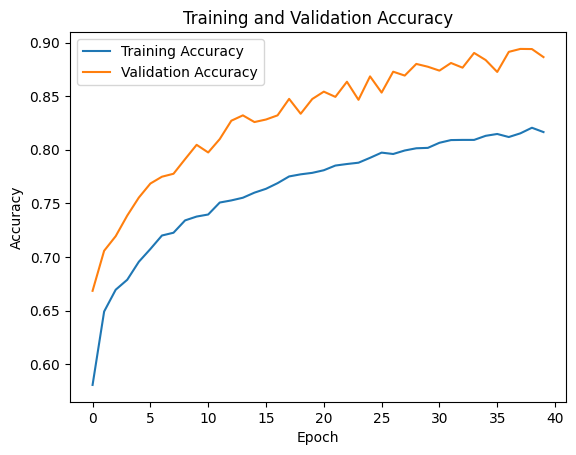

In [46]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show() 

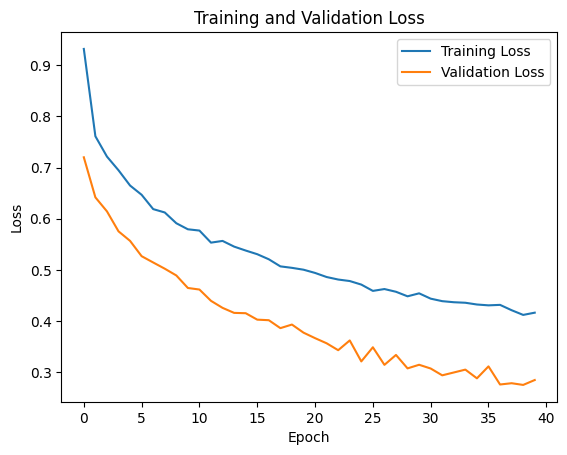

In [61]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show() 

In [2]:
from keras.models import load_model

# Load the model
model = load_model('alzhimer_classification_efficientNet.h5')

# Print the model summary
model.summary()



Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 8, 8, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
 3 (GlobalAveragePooling2D)                                      
                                                                 
 dense_36 (Dense)            (None, 256)               327936    
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 4378535 (16.70 MB)
Trainable params: 

In [41]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_x,test_y_one_hot)
print(f'Test accuracy: {test_acc}')

250/250 [==============================] - 962s 4s/step - loss: 0.2847 - accuracy: 0.8865
Test accuracy: 0.8865000009536743


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# Assuming you have the following variables defined: test_x, test_y_one_hot
# Map string labels to integer labels
label_mapping = {'VeryMildDemented': 0, 'NonDemented': 1, 'ModerateDemented': 2, 'MildDemented': 3}

# Make predictions on the test set
predictions = model.predict(test_x)
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded test labels back to integers
true_classes = np.argmax(test_y_one_hot, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

250/250 [==============================] - 168s 671ms/step


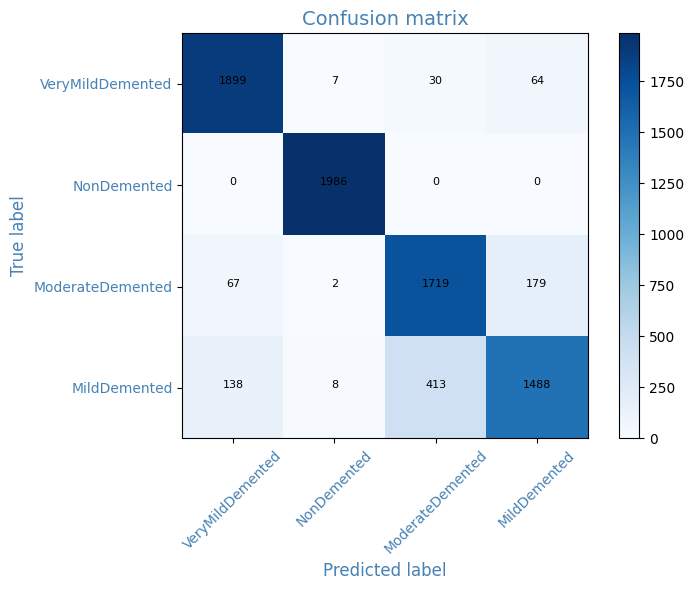

In [44]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):

    title = 'Confusion matrix'
    if normalize:
        y_true = y_true.astype('float') / y_true.sum(axis=0, keepdims=True)
        title = 'Normalized confusion matrix'
    
    # Define custom colors for the plot
    blue, green = "#4682B4", "#008000"
    
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.imshow(confusion_matrix(y_true, y_pred), interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14, color=blue)  # Adjust title fontsize and color
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=10, color=blue)  # Use blue for the ticks
    plt.yticks(tick_marks, classes, fontsize=10, color=blue)  # Use blue for the ticks

    fmt = '.2f' if normalize else 'd'
    thresh = y_true.max() / 2.
    for i, j in itertools.product(range(len(classes)), range(len(classes))):
        plt.text(j, i, format(y_true[i] if normalize else cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if y_true[i] > thresh else "black", fontsize=8)

    plt.ylabel('True label', fontsize=12, color=blue)  # Use blue for the labels
    plt.xlabel('Predicted label', fontsize=12, color=blue)  # Use blue for the labels
    plt.tight_layout()
# Plot non-normalized confusion matrix with a blue and green theme (Blues)
plot_confusion_matrix(true_classes, predicted_classes, classes=label_mapping.keys(), normalize=False, cmap=plt.cm.Blues)

plt.show()

In [29]:
from sklearn.metrics import classification_report
import pandas as pd

disease = {0:'VeryMildDemented', 1:'NonDemented', 2:'ModerateDemented', 3:'MildDemented'}


# Mapping actual and predicted classes to disease names
actual_classes = [disease[x] for x in test_y]
predict_classes = [disease[x] for x in predicted_classes]

# Generate classification report
report = classification_report(actual_classes, predict_classes, output_dict=True)

# Convert classification report to DataFrame
classification_df = pd.DataFrame(report)

classification_df

,MildDemented,ModerateDemented,NonDemented,VeryMildDemented,accuracy,macro avg,weighted avg
precision,0.859619,0.795097,0.991513,0.902567,0.8865,0.887199,0.887234
recall,0.726917,0.873920,1.000000,0.949500,0.8865,0.887584,0.886500
f1-score,0.787718,0.832647,0.995738,0.925439,0.8865,0.885386,0.884836
support,2047.000000,1967.000000,1986.000000,2000.000000,0.8865,8000.000000,8000.000000


In [51]:
import numpy as np

label_mapping = {'VeryMildDemented': 0, 'NonDemented': 1, 'ModerateDemented': 2, 'MildDemented': 3}
image = np.expand_dims(train_x[9750], axis=0)
predicted_index = np.argmax(model.predict(image))
predicted_class_name = list(label_mapping.keys())[predicted_index]

print(predicted_class_name)

1/1 [==============================] - 1s 700ms/step
NonDemented


Text(0.5, 1.0, 'NonDemented')

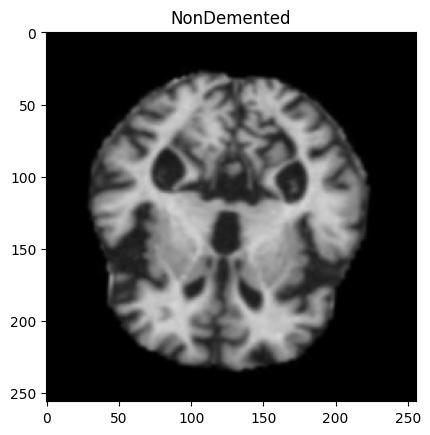

In [57]:
label_mapping = {0:'VeryMildDemented', 1:'NonDemented', 2:'ModerateDemented', 3:'MildDemented'}
plt.imshow(train_x[9750])
actual_class_index = label_mapping[train_y[9750]]
plt.title(actual_class_index)

In [58]:
import numpy as np

label_mapping = {'VeryMildDemented': 0, 'NonDemented': 1, 'ModerateDemented': 2, 'MildDemented': 3}
image = np.expand_dims(train_x[28000], axis=0)
predicted_index = np.argmax(model.predict(image))
predicted_class_name = list(label_mapping.keys())[predicted_index]

print(predicted_class_name)

1/1 [==============================] - 1s 727ms/step
ModerateDemented


Text(0.5, 1.0, 'ModerateDemented')

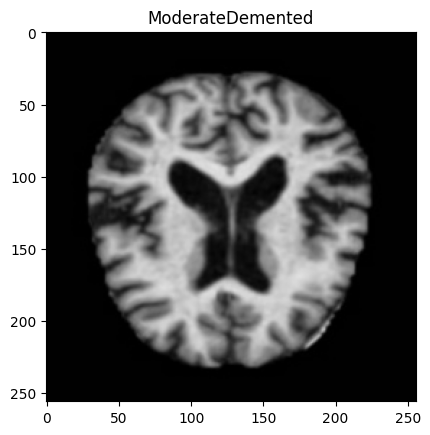

In [60]:
label_mapping = {0:'VeryMildDemented', 1:'NonDemented', 2:'ModerateDemented', 3:'MildDemented'}
plt.imshow(train_x[20000])
actual_class_index = label_mapping[train_y[20000]]
plt.title(actual_class_index)